# Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot(time_series, embedding):
    _, [ax1, ax2] = plt.subplots(2, 1, figsize=(20, 5), sharex='all')
    ax1.plot(time_series)
    ax2.imshow(embedding, aspect='auto', cmap='Grays')

## Initialization

In [3]:
from patsemb.discretization import SAXDiscretizer
from patsemb.pattern_mining import QCSP
from patsemb.pattern_based_embedding import PatternBasedEmbedder

discretizer = SAXDiscretizer()
pattern_miner = QCSP()
pattern_based_embedder = PatternBasedEmbedder(
    discretizer=discretizer,
    pattern_miner=pattern_miner
)

## Univariate time series

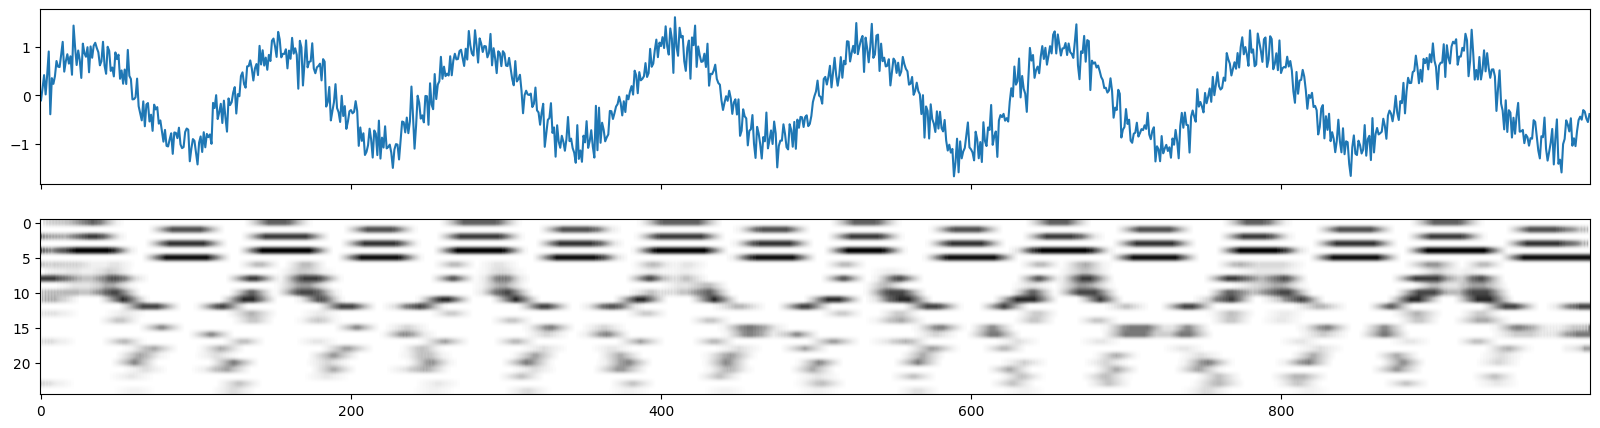

In [4]:
# Initialize the time series
univariate_time_series = np.sin(np.arange(0, 50, 0.05)) + np.random.normal(0, 0.25, 1000)

# Create the embedding
embedding = pattern_based_embedder.fit_transform(univariate_time_series)

# Visualize
plot(univariate_time_series, embedding)

## Multivariate time series

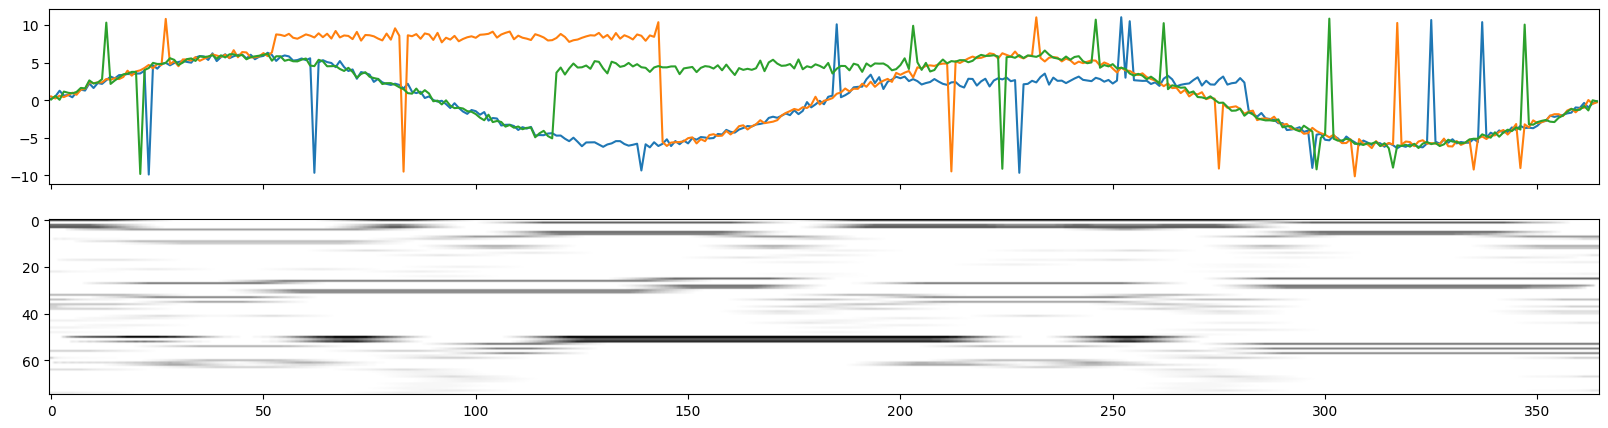

In [5]:
# Initialize the time series
multivariate_time_series = np.load('../data/z-grouping-synthetic.pickle', allow_pickle=True)['X'][:3].T

# Create the embedding
embedding = pattern_based_embedder.fit_transform(multivariate_time_series)

# Visualize
plot(multivariate_time_series, embedding)

## Collection of time series

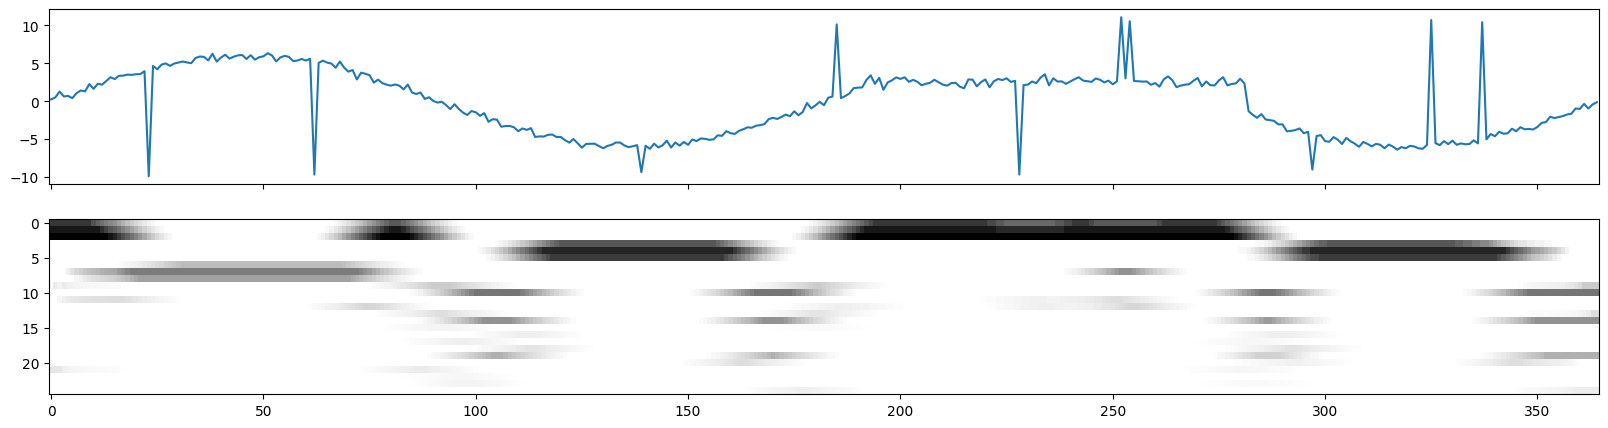

In [6]:
# Initialize a collection of time series
collection_of_time_series = [multivariate_time_series[:, i] for i in range(multivariate_time_series.shape[1])]

# Fit the embedding using the collection of time series, except the first time series
embedding = pattern_based_embedder.fit(collection_of_time_series[1:])

# Visualize the embedding of the first time series, which was not used for fitting
plot(collection_of_time_series[0], pattern_based_embedder.transform(collection_of_time_series[0]))